In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.dark_palette("#69d", reverse=True, as_cmap=True)
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
cb_js = {'function': 0.3289956011730205, '(': 0.32389523182724317, 'identifier': 0.24911635063722426, ',': 0.22259021297011158, ')': 0.3265395408525327, '{': 0.2908728376436506, '.': 0.2369691626382122, 'property_identifier': 0.23301735070917853, ';': 0.299900953014748, '}': 0.16689787243592247, 'var': 0.15, '=': 0.22883136541112625, 'this': 0.20056931189898364, 'if': 0.1562316381934412, '[': 0.2425334003673047, ']': 0.2583219703577646, 'number': 0.1503834914305092, 'return': 0.21081166956245445, '"': 0.2712660762173434, 'string_fragment': 0.2713593367160495, "'": 0.27717754212435763, ':': 0.22123630935153168}
rb_js = {'function': 0.3289956011730205, ')': 0.3265395408525327, '(': 0.32389523182724317, ';': 0.299900953014748, '{': 0.2908728376436506, "'": 0.27717754212435763, 'string_fragment': 0.2713593367160495, '"': 0.2712660762173434, ']': 0.2583219703577646, 'identifier': 0.24911635063722426, '[': 0.2425334003673047, '.': 0.2369691626382122, 'property_identifier': 0.23301735070917853, '=': 0.22883136541112625, ',': 0.22259021297011158, ':': 0.22123630935153168, 'return': 0.21081166956245445, 'this': 0.20056931189898364, '}': 0.16689787243592247, 'if': 0.1562316381934412, 'number': 0.1503834914305092, 'var': 0.15, '&&': 0.14173873601451467, '+': 0.1327027533245926, '===': 0.12951337528518064, '!': 0.12334071682100825, '||': 0.11628654129770946}
uc_js = {'function': 0.6757917432143982, 'string_fragment': 0.293309553419877, '=': 0.2881927194474976, 'var': 0.2822039519350908, ',': 0.28113964728425855, ':': 0.28050668324525957, 'return': 0.2764263160066307, '&&': 0.27447868159825545, '||': 0.2701201608433664, 'else': 0.2683034669302192, '{': 0.26483301674589027, '(': 0.26120403759581334, '+': 0.2600720772153931, ';': 0.2561753433165158, ')': 0.25098048495001746, 'property_identifier': 0.24307293330782812, '.': 0.23900007928687123, '===': 0.23675658885092352, 'identifier': 0.2289542345542243, '}': 0.22784698779307314, ']': 0.22586402324318972, 'this': 0.2240443100581587, 'if': 0.2231508064789592, '"': 0.21793783146211376, "'": 0.20937047801950381, '!': 0.20761622308275451, '[': 0.20478763083472304, 'number': 0.17520942704722015}
gcb_js = {')': 0.3672255555166812, 'this': 0.3650913271171286, 'string_fragment': 0.34227955932832915, 'identifier': 0.3058575365819431, ']': 0.3037447976559635, '}': 0.29861367967929864, ';': 0.2824979063501703, 'property_identifier': 0.27906685952849397, 'return': 0.26635279521274585, '{': 0.25855473533487655, 'function': 0.25279233370190535, '"': 0.24394659065629837, "'": 0.23465025938303719, 'number': 0.2118116101822117, '(': 0.19902906544195495, '.': 0.1916196713449232, '[': 0.1890280246919979, ',': 0.17744584406709005, '+': 0.15020302720811968, ':': 0.14922126786339926, '!': 0.14175762589736063, 'if': 0.13314233372946976, '&&': 0.13235258542485637, '||': 0.12916205151427995, '=': 0.1279195364365272, 'var': 0.12035441570383401, '===': 0.09879910747862712}

In [3]:
cb_go={'if': 0.34149354763413253, '}': 0.3201503051485779, ',': 0.3146746505740651, '!=': 0.29368343121640456, ')': 0.28912848172901384, 'return': 0.28075660561488736, ':': 0.279200937202548, '{': 0.27444109617793333, ']': 0.27236627722909895, '"': 0.27178525186028735, '=': 0.2568624639182888, '(': 0.25045954276634114, '[': 0.24782154660627945, 'package_identifier': 0.24251670843776107, 'field_identifier': 0.23903334035798987, 'type_identifier': 0.2356947783283455, 'identifier': 0.2341573257655789, '*': 0.20798050563508985, '.': 0.2042199922290135, ':=': 0.19395874950695355, 'func': 0.16629527988712278, 'int_literal': 0.16434473399412503, 'nil': 0.15935666217143085}
rb_go={'return': 0.4999739966532163, '"': 0.31172098029733397, 'package_identifier': 0.28850877192982455, '=': 0.2760597846199393, 'if': 0.2737186968555137, ':': 0.2685280550606497, ',': 0.25894129424081463, 'type_identifier': 0.2587684726378736, 'field_identifier': 0.25871676250305237, '.': 0.2552509142239044, 'identifier': 0.25465093013465745, '[': 0.2536683701572924, '*': 0.2525577395137159, ']': 0.2515694617113117, ':=': 0.2397452699349815, '!=': 0.239230788373482, '(': 0.2373075047511405, ')': 0.22690101356155387, 'func': 0.22352613482253345, '}': 0.22121747847703427, '{': 0.22004380459389433, 'int_literal': 0.16092911663488682, 'nil': 0.119273958668129}
uc_go={'func': 0.8551715197625455, 'package_identifier': 0.32164049075813783, '!=': 0.31713638115619375, 'field_identifier': 0.3108630862641914, 'nil': 0.293834868593046, 'type_identifier': 0.28989279092374937, 'identifier': 0.2855388037117386, 'int_literal': 0.2807173267560052, ':': 0.2751521926516539, '(': 0.24494230453857418, '[': 0.2315795374811021, '{': 0.2197866876167585, '=': 0.21676753947289684, ':=': 0.21617976001591482, '"': 0.2157636879140897, ',': 0.2049332564996627, '*': 0.1995422554762764, 'if': 0.1985569606804596, ']': 0.19067480464840353, '.': 0.17536156715547846, 'return': 0.17107985406904913, ')': 0.16696690164569078, '}': 0.14771630235338495}
gcb_go={':=': 0.30830990037280676, '.': 0.30050957944034234, 'package_identifier': 0.29265664160401, '*': 0.2904015337478275, ')': 0.28936520683445105, '=': 0.28209653245503663, 'type_identifier': 0.27696119315115536, '(': 0.2768395762787822, 'return': 0.27608212162836016, 'if': 0.27061755977191637, '}': 0.26806422005920083, 'field_identifier': 0.26385948010851423, '"': 0.26072492707049594, ']': 0.26010787394886603, '{': 0.25717208227195104, '[': 0.2307879154171002, 'identifier': 0.22341056994201156, ':': 0.22194371903448612, 'func': 0.21527267247795653, ',': 0.20978401793259496, 'int_literal': 0.1318519918231323, 'nil': 0.11494329044635372, '!=': 0.10498270455902847}
cb_java={'string_literal': 0.3521622760084037, ';': 0.33402513174815585, ')': 0.3223752046261454, '}': 0.3189476197740825, 'public': 0.31843664663294896, '{': 0.31181630259284404, 'if': 0.28020843646092664, '=': 0.2754414252163014, 'return': 0.27463975805973395, 'int': 0.2691020447259143, 'final': 0.2584851889563803, ',': 0.25577757676997803, 'identifier': 0.2365217700899513, 'type_identifier': 0.22993775511001163, '(': 0.21669605445704687, '+': 0.21088806287059417, '>': 0.20738419568302888, '.': 0.2000496920369124, 'new': 0.1997578645963449, '[': 0.18971336694823582, ']': 0.1837944781272617, 'decimal_integer_literal': 0.17132400594716177, '<': 0.1661718817716911, '==': 0.13134920045730575, 'null_literal': 0.09342304615398367}
rb_java={'public': 0.3488971408247783, '<': 0.3400100917544794, '{': 0.33116069642441354, 'return': 0.3301990472613706, '+': 0.3281596510451345, ')': 0.3228199532890521, '=': 0.3220712608150699, ';': 0.31434009014377373, '}': 0.3091856092011966, ']': 0.2938018342963587, '>': 0.29299920738788227, ',': 0.27841302859090683, 'string_literal': 0.2708332788262042, 'final': 0.27063363880013575, '.': 0.2590956539825249, 'if': 0.25857880718902954, 'type_identifier': 0.23039472237360994, 'identifier': 0.22740068021458626, '[': 0.22091847893551494, 'int': 0.20943932026526782, 'new': 0.19941580029594327, '(': 0.19666018321954454, 'decimal_integer_literal': 0.05322106159378852, '==': 0.04641727665513504, 'null_literal': 0.036895924487488324}
uc_java={'public': 0.6746610807757485, ',': 0.34526401146850916, '+': 0.34215057992843234, '=': 0.33897061412625556, 'if': 0.33474360591346025, '(': 0.32723475914363925, '==': 0.3228907773655047, ':': 0.3013539077279052, '<': 0.287612226280066, '.': 0.27106609903288514, '[': 0.2698952130256888, 'type_identifier': 0.2612930490706366, '{': 0.25638132028869354, 'string_literal': 0.23749811511332058, 'identifier': 0.23614763153441148, 'final': 0.20659168500965816, ';': 0.20397423120429592, 'return': 0.20395795304806805, '}': 0.17893043673986242, '>': 0.1574511977770605, 'int': 0.15648871399271105, 'decimal_integer_literal': 0.1421645678633158, 'new': 0.13705133387950186, ']': 0.12914490585212998, 'null_literal': 0.1254772110779947, ')': 0.12203202981089943}
gcb_java={'public': 0.32479338344776865, 'string_literal': 0.31183136104737413, 'type_identifier': 0.29959296564843985, 'return': 0.2993220137969204, 'identifier': 0.2938140499551383, ';': 0.2881354585562241, ')': 0.2845668227747761, '}': 0.2822774818755265, '{': 0.2669085809046259, 'final': 0.24421544187352973, '(': 0.2156798873176673, 'new': 0.2138728212617945, ']': 0.21156401646832695, 'decimal_integer_literal': 0.21111471160077772, ',': 0.1998098525535919, 'int': 0.1951955420580231, '.': 0.18263614048375418, '[': 0.17808312299389376, '=': 0.160273555861129, 'null_literal': 0.15918141147972523, '<': 0.1511751012271078, '==': 0.14455984320945495, '+': 0.14233436964260437, 'if': 0.14082862669058824, '>': 0.1282575436397486}
cb_python = {')': 0.6620655693589087, 'if': 0.6541469238172799, ']': 0.6533805162703762, 'for': 0.6158922884760373, 'def': 0.28549987838952134, ':': 0.2568606452973771, 'identifier': 0.2272641933140505, 'return': 0.21329086883908804, '"': 0.18385482950805285, ',': 0.17849290226995612, '(': 0.16148123879433024, 'integer': 0.14299778124047288, '.': 0.14124537866977438, '[': 0.13707740660087414, '=': 0.13591798026110297, 'in': 0.10591287570129347, 'none': 0.08820851982372778}
rb_python = {'identifier': 0.2896797663323821, 'none': 0.27735288235415817, 'return': 0.25890394997475435, 'integer': 0.24351732664882625, '(': 0.24038623883452995, '.': 0.2384975385362824, 'def': 0.2374607732053556, ']': 0.23743835744739766, '=': 0.23266557084647163, ')': 0.23248436093807903, ':': 0.23209368737881406, 'for': 0.21703782056331372, '[': 0.21670991057776953, ',': 0.2104224333263315, 'if': 0.19465138446731325, 'in': 0.18200380267311062, '"': 0.17227127109955037}
uc_python = {'def': 0.8264398951225018, ']': 0.46180529314853164, ':': 0.2775212540377717, 'for': 0.2740201068974294, ')': 0.25441083919877894, '=': 0.251565127486386, 'identifier': 0.2515462701403932, '(': 0.24934164490959845, ',': 0.2385483688376984, 'in': 0.22493731062584893, 'if': 0.22423742245066833, '[': 0.1920185697705562, 'return': 0.18985930567013756, '.': 0.180259101747359, '"': 0.15748635311216644, 'integer': 0.15297950372462588, 'none': 0.1203621025135272}
gcb_python = {'for': 0.6202921219350265, 'if': 0.6130501776856445, ')': 0.45374124300764085, ']': 0.2858728096787461, 'def': 0.2824833452966406, 'return': 0.2646055851167126, 'identifier': 0.2456844005851164, ':': 0.24053106822109183, ',': 0.20900922624115503, '=': 0.2000489020362186, 'in': 0.1905879157417554, '[': 0.19001644813047305, '(': 0.18945219852225859, '.': 0.17600567422991495, 'integer': 0.17554452762440298, '"': 0.15618354963156825, 'none': 0.13164210395646986}

In [55]:
def long_type_name_alias(str_):
    full_name=str_
    #input 'decimal_integer_literal',output 'd_i_literal',{'decimal_integer_literal':'d_i_literal'}
    new_name=''
    i=0
    if '_' not in str_:
        return str_
    else:
        while True:
            id_=str_.find('_')
            if id_!=-1:
                new_name+=str_[0]+'_'
                i=id_+1
                str_=str_[i:]
            else:
                new_name+=str_
                break
        return new_name
long_type_name_alias('decimal_integer_literal')

'd_i_literal'

In [64]:
models=['rb','cb','gcb','uc']
model_full_name={'rb':'RoBERTa',"cb":'CodeBERT','gcb':'GraphCodeBERT','uc':'UniXcoder'}
languages=['go','java','js','python']
language_full_name={'go':'Go','java':'Java','js':'JavaScript','python':'Python'}
full_dic={}
for model in models:
    for language in languages:
        dict_=eval(model+'_'+language)
        for key,value in dict_.items():
            new_name=long_type_name_alias(key)
            if new_name!=key:
                full_dic[key]=new_name
full_dic

{'package_identifier': 'p_identifier',
 'type_identifier': 't_identifier',
 'field_identifier': 'f_identifier',
 'int_literal': 'i_literal',
 'string_literal': 's_literal',
 'decimal_integer_literal': 'd_i_literal',
 'null_literal': 'n_literal',
 'string_fragment': 's_fragment',
 'property_identifier': 'p_identifier'}

In [65]:
def rename_key(dict_):
    new_dict={}
    for key,value in dict_.items():
        if key in full_dic:
            new_dict[full_dic[key]]=value
        else:
            new_dict[key]=value
    return new_dict

In [66]:
rename_key({"f":1,"int_literal":2})

{'f': 1, 'i_literal': 2}

In [67]:
cb_js = rename_key({'function': 0.3289956011730205, '(': 0.32389523182724317, 'identifier': 0.24911635063722426, ',': 0.22259021297011158, ')': 0.3265395408525327, '{': 0.2908728376436506, '.': 0.2369691626382122, 'property_identifier': 0.23301735070917853, ';': 0.299900953014748, '}': 0.16689787243592247, 'var': 0.15, '=': 0.22883136541112625, 'this': 0.20056931189898364, 'if': 0.1562316381934412, '[': 0.2425334003673047, ']': 0.2583219703577646, 'number': 0.1503834914305092, 'return': 0.21081166956245445, '"': 0.2712660762173434, 'string_fragment': 0.2713593367160495, "'": 0.27717754212435763, ':': 0.22123630935153168})
rb_js = rename_key({'function': 0.3289956011730205, ')': 0.3265395408525327, '(': 0.32389523182724317, ';': 0.299900953014748, '{': 0.2908728376436506, "'": 0.27717754212435763, 'string_fragment': 0.2713593367160495, '"': 0.2712660762173434, ']': 0.2583219703577646, 'identifier': 0.24911635063722426, '[': 0.2425334003673047, '.': 0.2369691626382122, 'property_identifier': 0.23301735070917853, '=': 0.22883136541112625, ',': 0.22259021297011158, ':': 0.22123630935153168, 'return': 0.21081166956245445, 'this': 0.20056931189898364, '}': 0.16689787243592247, 'if': 0.1562316381934412, 'number': 0.1503834914305092, 'var': 0.15, '&&': 0.14173873601451467, '+': 0.1327027533245926, '===': 0.12951337528518064, '!': 0.12334071682100825, '||': 0.11628654129770946})
uc_js = rename_key({'function': 0.6757917432143982, 'string_fragment': 0.293309553419877, '=': 0.2881927194474976, 'var': 0.2822039519350908, ',': 0.28113964728425855, ':': 0.28050668324525957, 'return': 0.2764263160066307, '&&': 0.27447868159825545, '||': 0.2701201608433664, 'else': 0.2683034669302192, '{': 0.26483301674589027, '(': 0.26120403759581334, '+': 0.2600720772153931, ';': 0.2561753433165158, ')': 0.25098048495001746, 'property_identifier': 0.24307293330782812, '.': 0.23900007928687123, '===': 0.23675658885092352, 'identifier': 0.2289542345542243, '}': 0.22784698779307314, ']': 0.22586402324318972, 'this': 0.2240443100581587, 'if': 0.2231508064789592, '"': 0.21793783146211376, "'": 0.20937047801950381, '!': 0.20761622308275451, '[': 0.20478763083472304, 'number': 0.17520942704722015})
gcb_js = rename_key({')': 0.3672255555166812, 'this': 0.3650913271171286, 'string_fragment': 0.34227955932832915, 'identifier': 0.3058575365819431, ']': 0.3037447976559635, '}': 0.29861367967929864, ';': 0.2824979063501703, 'property_identifier': 0.27906685952849397, 'return': 0.26635279521274585, '{': 0.25855473533487655, 'function': 0.25279233370190535, '"': 0.24394659065629837, "'": 0.23465025938303719, 'number': 0.2118116101822117, '(': 0.19902906544195495, '.': 0.1916196713449232, '[': 0.1890280246919979, ',': 0.17744584406709005, '+': 0.15020302720811968, ':': 0.14922126786339926, '!': 0.14175762589736063, 'if': 0.13314233372946976, '&&': 0.13235258542485637, '||': 0.12916205151427995, '=': 0.1279195364365272, 'var': 0.12035441570383401, '===': 0.09879910747862712})
cb_go=rename_key({'if': 0.34149354763413253, '}': 0.3201503051485779, ',': 0.3146746505740651, '!=': 0.29368343121640456, ')': 0.28912848172901384, 'return': 0.28075660561488736, ':': 0.279200937202548, '{': 0.27444109617793333, ']': 0.27236627722909895, '"': 0.27178525186028735, '=': 0.2568624639182888, '(': 0.25045954276634114, '[': 0.24782154660627945, 'package_identifier': 0.24251670843776107, 'field_identifier': 0.23903334035798987, 'type_identifier': 0.2356947783283455, 'identifier': 0.2341573257655789, '*': 0.20798050563508985, '.': 0.2042199922290135, ':=': 0.19395874950695355, 'func': 0.16629527988712278, 'int_literal': 0.16434473399412503, 'nil': 0.15935666217143085})
rb_go=rename_key({'return': 0.4999739966532163, '"': 0.31172098029733397, 'package_identifier': 0.28850877192982455, '=': 0.2760597846199393, 'if': 0.2737186968555137, ':': 0.2685280550606497, ',': 0.25894129424081463, 'type_identifier': 0.2587684726378736, 'field_identifier': 0.25871676250305237, '.': 0.2552509142239044, 'identifier': 0.25465093013465745, '[': 0.2536683701572924, '*': 0.2525577395137159, ']': 0.2515694617113117, ':=': 0.2397452699349815, '!=': 0.239230788373482, '(': 0.2373075047511405, ')': 0.22690101356155387, 'func': 0.22352613482253345, '}': 0.22121747847703427, '{': 0.22004380459389433, 'int_literal': 0.16092911663488682, 'nil': 0.119273958668129})
uc_go=rename_key({'func': 0.8551715197625455, 'package_identifier': 0.32164049075813783, '!=': 0.31713638115619375, 'field_identifier': 0.3108630862641914, 'nil': 0.293834868593046, 'type_identifier': 0.28989279092374937, 'identifier': 0.2855388037117386, 'int_literal': 0.2807173267560052, ':': 0.2751521926516539, '(': 0.24494230453857418, '[': 0.2315795374811021, '{': 0.2197866876167585, '=': 0.21676753947289684, ':=': 0.21617976001591482, '"': 0.2157636879140897, ',': 0.2049332564996627, '*': 0.1995422554762764, 'if': 0.1985569606804596, ']': 0.19067480464840353, '.': 0.17536156715547846, 'return': 0.17107985406904913, ')': 0.16696690164569078, '}': 0.14771630235338495})
gcb_go=rename_key({':=': 0.30830990037280676, '.': 0.30050957944034234, 'package_identifier': 0.29265664160401, '*': 0.2904015337478275, ')': 0.28936520683445105, '=': 0.28209653245503663, 'type_identifier': 0.27696119315115536, '(': 0.2768395762787822, 'return': 0.27608212162836016, 'if': 0.27061755977191637, '}': 0.26806422005920083, 'field_identifier': 0.26385948010851423, '"': 0.26072492707049594, ']': 0.26010787394886603, '{': 0.25717208227195104, '[': 0.2307879154171002, 'identifier': 0.22341056994201156, ':': 0.22194371903448612, 'func': 0.21527267247795653, ',': 0.20978401793259496, 'int_literal': 0.1318519918231323, 'nil': 0.11494329044635372, '!=': 0.10498270455902847})
cb_java=rename_key({'string_literal': 0.3521622760084037, ';': 0.33402513174815585, ')': 0.3223752046261454, '}': 0.3189476197740825, 'public': 0.31843664663294896, '{': 0.31181630259284404, 'if': 0.28020843646092664, '=': 0.2754414252163014, 'return': 0.27463975805973395, 'int': 0.2691020447259143, 'final': 0.2584851889563803, ',': 0.25577757676997803, 'identifier': 0.2365217700899513, 'type_identifier': 0.22993775511001163, '(': 0.21669605445704687, '+': 0.21088806287059417, '>': 0.20738419568302888, '.': 0.2000496920369124, 'new': 0.1997578645963449, '[': 0.18971336694823582, ']': 0.1837944781272617, 'decimal_integer_literal': 0.17132400594716177, '<': 0.1661718817716911, '==': 0.13134920045730575, 'null_literal': 0.09342304615398367})
rb_java=rename_key({'public': 0.3488971408247783, '<': 0.3400100917544794, '{': 0.33116069642441354, 'return': 0.3301990472613706, '+': 0.3281596510451345, ')': 0.3228199532890521, '=': 0.3220712608150699, ';': 0.31434009014377373, '}': 0.3091856092011966, ']': 0.2938018342963587, '>': 0.29299920738788227, ',': 0.27841302859090683, 'string_literal': 0.2708332788262042, 'final': 0.27063363880013575, '.': 0.2590956539825249, 'if': 0.25857880718902954, 'type_identifier': 0.23039472237360994, 'identifier': 0.22740068021458626, '[': 0.22091847893551494, 'int': 0.20943932026526782, 'new': 0.19941580029594327, '(': 0.19666018321954454, 'decimal_integer_literal': 0.05322106159378852, '==': 0.04641727665513504, 'null_literal': 0.036895924487488324})
uc_java=rename_key({'public': 0.6746610807757485, ',': 0.34526401146850916, '+': 0.34215057992843234, '=': 0.33897061412625556, 'if': 0.33474360591346025, '(': 0.32723475914363925, '==': 0.3228907773655047, ':': 0.3013539077279052, '<': 0.287612226280066, '.': 0.27106609903288514, '[': 0.2698952130256888, 'type_identifier': 0.2612930490706366, '{': 0.25638132028869354, 'string_literal': 0.23749811511332058, 'identifier': 0.23614763153441148, 'final': 0.20659168500965816, ';': 0.20397423120429592, 'return': 0.20395795304806805, '}': 0.17893043673986242, '>': 0.1574511977770605, 'int': 0.15648871399271105, 'decimal_integer_literal': 0.1421645678633158, 'new': 0.13705133387950186, ']': 0.12914490585212998, 'null_literal': 0.1254772110779947, ')': 0.12203202981089943})
gcb_java=rename_key({'public': 0.32479338344776865, 'string_literal': 0.31183136104737413, 'type_identifier': 0.29959296564843985, 'return': 0.2993220137969204, 'identifier': 0.2938140499551383, ';': 0.2881354585562241, ')': 0.2845668227747761, '}': 0.2822774818755265, '{': 0.2669085809046259, 'final': 0.24421544187352973, '(': 0.2156798873176673, 'new': 0.2138728212617945, ']': 0.21156401646832695, 'decimal_integer_literal': 0.21111471160077772, ',': 0.1998098525535919, 'int': 0.1951955420580231, '.': 0.18263614048375418, '[': 0.17808312299389376, '=': 0.160273555861129, 'null_literal': 0.15918141147972523, '<': 0.1511751012271078, '==': 0.14455984320945495, '+': 0.14233436964260437, 'if': 0.14082862669058824, '>': 0.1282575436397486})
cb_python =rename_key( {')': 0.6620655693589087, 'if': 0.6541469238172799, ']': 0.6533805162703762, 'for': 0.6158922884760373, 'def': 0.28549987838952134, ':': 0.2568606452973771, 'identifier': 0.2272641933140505, 'return': 0.21329086883908804, '"': 0.18385482950805285, ',': 0.17849290226995612, '(': 0.16148123879433024, 'integer': 0.14299778124047288, '.': 0.14124537866977438, '[': 0.13707740660087414, '=': 0.13591798026110297, 'in': 0.10591287570129347, 'none': 0.08820851982372778})
rb_python = rename_key({'identifier': 0.2896797663323821, 'none': 0.27735288235415817, 'return': 0.25890394997475435, 'integer': 0.24351732664882625, '(': 0.24038623883452995, '.': 0.2384975385362824, 'def': 0.2374607732053556, ']': 0.23743835744739766, '=': 0.23266557084647163, ')': 0.23248436093807903, ':': 0.23209368737881406, 'for': 0.21703782056331372, '[': 0.21670991057776953, ',': 0.2104224333263315, 'if': 0.19465138446731325, 'in': 0.18200380267311062, '"': 0.17227127109955037})
uc_python = rename_key({'def': 0.8264398951225018, ']': 0.46180529314853164, ':': 0.2775212540377717, 'for': 0.2740201068974294, ')': 0.25441083919877894, '=': 0.251565127486386, 'identifier': 0.2515462701403932, '(': 0.24934164490959845, ',': 0.2385483688376984, 'in': 0.22493731062584893, 'if': 0.22423742245066833, '[': 0.1920185697705562, 'return': 0.18985930567013756, '.': 0.180259101747359, '"': 0.15748635311216644, 'integer': 0.15297950372462588, 'none': 0.1203621025135272})
gcb_python = rename_key({'for': 0.6202921219350265, 'if': 0.6130501776856445, ')': 0.45374124300764085, ']': 0.2858728096787461, 'def': 0.2824833452966406, 'return': 0.2646055851167126, 'identifier': 0.2456844005851164, ':': 0.24053106822109183, ',': 0.20900922624115503, '=': 0.2000489020362186, 'in': 0.1905879157417554, '[': 0.19001644813047305, '(': 0.18945219852225859, '.': 0.17600567422991495, 'integer': 0.17554452762440298, '"': 0.15618354963156825, 'none': 0.13164210395646986})

In [68]:
cb_java_sorted_value = dict(sorted(cb_java.items(), key=lambda x: x[1], reverse = True))
rb_java_sorted_value = dict(sorted(rb_java.items(), key=lambda x: x[1], reverse = True))
uc_java_sorted_value = dict(sorted(uc_java.items(), key=lambda x: x[1], reverse = True))
gcb_java_sorted_value = dict(sorted(gcb_java.items(), key=lambda x: x[1], reverse = True))
java_data = [rb_java_sorted_value, cb_java_sorted_value, gcb_java_sorted_value, uc_java_sorted_value]

cb_js_sorted_value = dict(sorted(cb_js.items(), key=lambda x: x[1], reverse = True))
rb_js_sorted_value = dict(sorted(rb_js.items(), key=lambda x: x[1], reverse = True))
uc_js_sorted_value = dict(sorted(uc_js.items(), key=lambda x: x[1], reverse = True))
gcb_js_sorted_value = dict(sorted(gcb_js.items(), key=lambda x: x[1], reverse = True))
js_data = [rb_js_sorted_value, cb_js_sorted_value, gcb_js_sorted_value, uc_js_sorted_value]

cb_go_sorted_value = dict(sorted(cb_go.items(), key=lambda x: x[1], reverse = True))
rb_go_sorted_value = dict(sorted(rb_go.items(), key=lambda x: x[1], reverse = True))
uc_go_sorted_value = dict(sorted(uc_go.items(), key=lambda x: x[1], reverse = True))
gcb_go_sorted_value = dict(sorted(gcb_go.items(), key=lambda x: x[1], reverse = True))
go_data = [rb_go_sorted_value, cb_go_sorted_value, gcb_go_sorted_value, uc_go_sorted_value]

cb_python_sorted_value = dict(sorted(cb_python.items(), key=lambda x: x[1], reverse = True))
rb_python_sorted_value = dict(sorted(rb_python.items(), key=lambda x: x[1], reverse = True))
uc_python_sorted_value = dict(sorted(uc_python.items(), key=lambda x: x[1], reverse = True))
gcb_python_sorted_value = dict(sorted(gcb_python.items(), key=lambda x: x[1], reverse = True))
python_data = [rb_python_sorted_value, cb_python_sorted_value, gcb_python_sorted_value, uc_python_sorted_value]

In [5]:
len(java_data)

4

In [69]:
df = pd.DataFrame(list(rb_go_sorted_value.keys()), columns=['rb_token_keys'])
df = pd.concat([df, pd.DataFrame(list(rb_java_sorted_value.values()),columns=['rb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(cb_java_sorted_value.keys()),columns=['cb_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(cb_java_sorted_value.values()),columns=['cb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(gcb_java_sorted_value.keys()),columns=['gcb_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(gcb_java_sorted_value.values()),columns=['gcb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(uc_java_sorted_value.keys()),columns=['uc_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(uc_java_sorted_value.values()),columns=['uc_token_values'])],axis=1)

[0.4999739966532163, 0.31172098029733397, 0.28850877192982455, 0.2760597846199393, 0.2737186968555137, 0.2685280550606497, 0.2587684726378736, 0.25871676250305237]


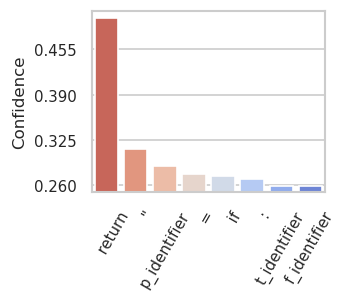

[0.34149354763413253, 0.28075660561488736, 0.279200937202548, 0.27178525186028735, 0.2568624639182888, 0.24251670843776107, 0.23903334035798987, 0.2356947783283455]


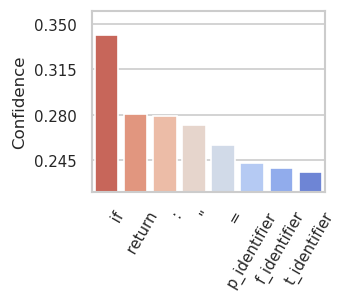

[0.29265664160401, 0.28209653245503663, 0.27696119315115536, 0.27608212162836016, 0.27061755977191637, 0.26385948010851423, 0.26072492707049594, 0.22194371903448612]


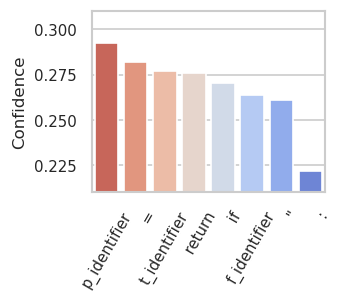

[0.32164049075813783, 0.3108630862641914, 0.28989279092374937, 0.2751521926516539, 0.21676753947289684, 0.2157636879140897, 0.1985569606804596, 0.17107985406904913]


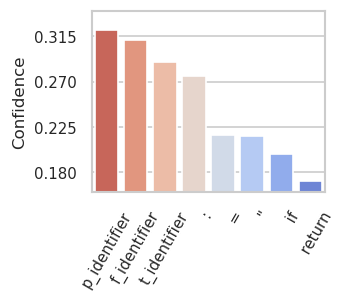

[0.3488971408247783, 0.33116069642441354, 0.3301990472613706, 0.3228199532890521, 0.3220712608150699, 0.31434009014377373, 0.3091856092011966, 0.27841302859090683, 0.2708332788262042]


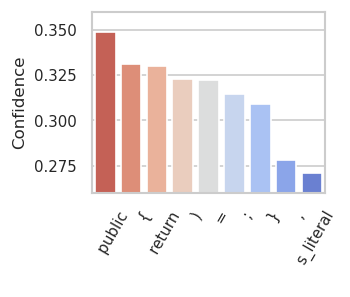

[0.3521622760084037, 0.33402513174815585, 0.3223752046261454, 0.3189476197740825, 0.31843664663294896, 0.31181630259284404, 0.2754414252163014, 0.27463975805973395, 0.25577757676997803]


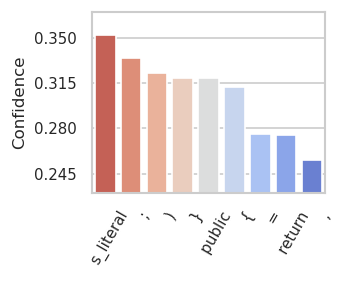

[0.32479338344776865, 0.31183136104737413, 0.2993220137969204, 0.2881354585562241, 0.2845668227747761, 0.2822774818755265, 0.2669085809046259, 0.1998098525535919, 0.160273555861129]


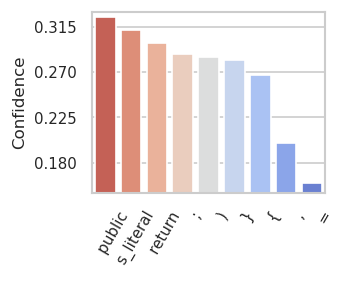

[0.6746610807757485, 0.34526401146850916, 0.33897061412625556, 0.25638132028869354, 0.23749811511332058, 0.20397423120429592, 0.20395795304806805, 0.17893043673986242, 0.12203202981089943]


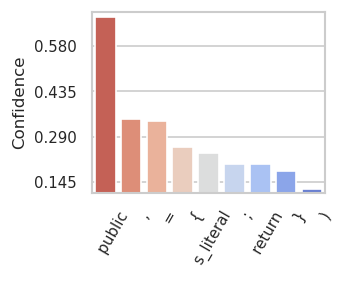

[0.3289956011730205, 0.3265395408525327, 0.32389523182724317, 0.299900953014748, 0.2908728376436506, 0.2713593367160495, 0.24911635063722426, 0.22259021297011158]


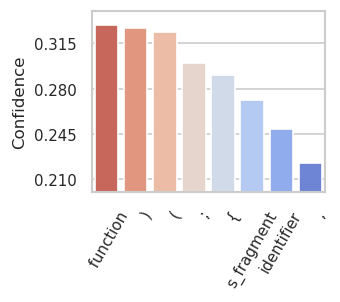

[0.3289956011730205, 0.3265395408525327, 0.32389523182724317, 0.299900953014748, 0.2908728376436506, 0.2713593367160495, 0.24911635063722426, 0.22259021297011158]


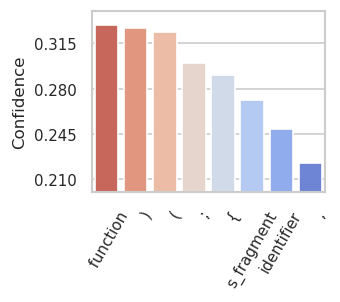

[0.3672255555166812, 0.34227955932832915, 0.3058575365819431, 0.2824979063501703, 0.25855473533487655, 0.25279233370190535, 0.19902906544195495, 0.17744584406709005]


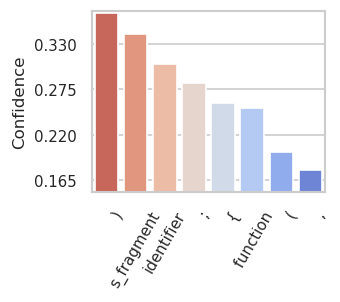

[0.6757917432143982, 0.293309553419877, 0.28113964728425855, 0.26483301674589027, 0.26120403759581334, 0.2561753433165158, 0.25098048495001746, 0.2289542345542243]


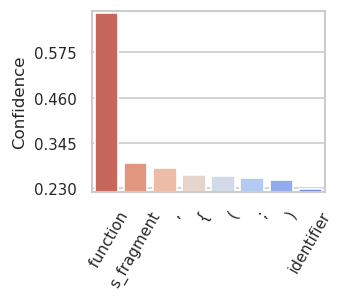

[0.2896797663323821, 0.25890394997475435, 0.24038623883452995, 0.2374607732053556, 0.23743835744739766, 0.23266557084647163, 0.23248436093807903, 0.23209368737881406, 0.21703782056331372, 0.2104224333263315, 0.19465138446731325]


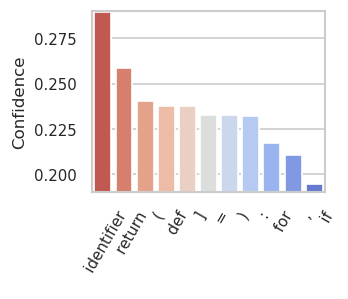

[0.6620655693589087, 0.6541469238172799, 0.6533805162703762, 0.6158922884760373, 0.28549987838952134, 0.2568606452973771, 0.2272641933140505, 0.21329086883908804, 0.17849290226995612, 0.16148123879433024, 0.13591798026110297]


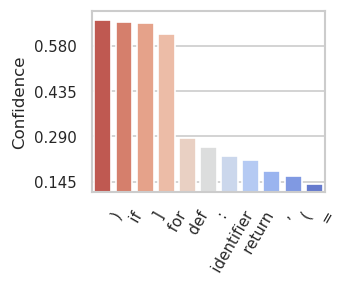

[0.6202921219350265, 0.6130501776856445, 0.45374124300764085, 0.2858728096787461, 0.2824833452966406, 0.2646055851167126, 0.2456844005851164, 0.24053106822109183, 0.20900922624115503, 0.2000489020362186, 0.18945219852225859]


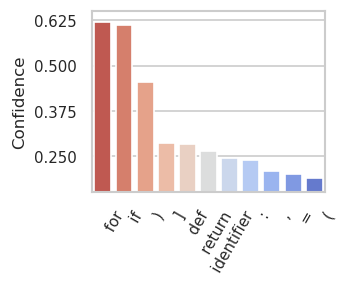

[0.8264398951225018, 0.46180529314853164, 0.2775212540377717, 0.2740201068974294, 0.25441083919877894, 0.251565127486386, 0.2515462701403932, 0.24934164490959845, 0.2385483688376984, 0.22423742245066833, 0.18985930567013756]


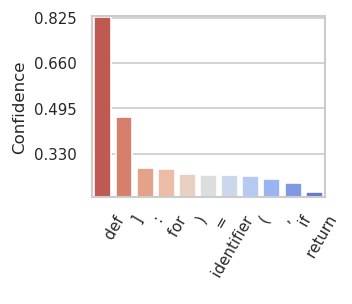

In [216]:
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
models=['rb','cb','gcb','uc']
model_full_name={'rb':'RoBERTa',"cb":'CodeBERT','gcb':'GraphCodeBERT','uc':'UniXcoder'}
languages=['go','java','js','python']
language_full_name={'go':'Go','java':'Java','js':'JavaScript','python':'Python'}
frequent_type={}
frequent_type['js']=['function', ')', '(', '{', 's_fragment', ';', 'identifier', ',']
frequent_type['go']=['p_identifier', 'if', '=', 'return', 't_identifier', ':', '"', 'f_identifier']
frequent_type['java']=['public', 's_literal', '{', ';', 'return', '=', '}', ',', ')']
frequent_type['python']=[']', 'def', ')', 'for', 'identifier', ':', 'if', 'return', '(', '=',',']
y_height={}
y_height['gcb']={'go':[0.210,0.310,0.025],'java':[0.15,0.33,0.045],'js':[0.15,0.37,0.055],'python':[0.150,0.650,0.125]}
y_height['rb']={'go':[0.250,0.510,0.065],'java':[0.26,0.36,0.025],'js':[0.200,0.340,0.035],'python':[0.190,0.290,0.025]}
y_height['cb']={'go':[0.220,0.360,0.035],'java':[0.230,0.370,0.035],'js':[0.200,0.340,0.035],'python':[0.110,0.690,0.145]}
y_height['uc']={'go':[0.160,0.340,0.045],'java':[0.110,0.690,0.145],'js':[0.220,0.680,0.115],'python':[0.170,0.830,0.165]}
x_height={'go':12,'java':13,'js':10,'python':13}
def padding_x_name(str_,lang):
    #len("p_identifier")=12 every type padding to 12 like '         for' for same size subgraph
    return ' '*(x_height[lang]-len(str_))+str_
def get_freq_type_dict(dict_,lang):
    dict_new={}
    for key,value in dict_.items():
        if key in frequent_type[lang]:
            dict_new[padding_x_name(key,lang)]=value
    return dict_new
# from matplotlib.pyplot import MultipleLocator
for language in languages:
    i=1
#     plt.figure(figsize=(15,15))
    for model in models: #models:
        _dict=eval(model+'_'+language+'_sorted_value')
        #print(_dict.keys())
        _dict=get_freq_type_dict(_dict,language)
#         print(_dict.keys())
        _keys = list(_dict.keys())
        _values = list(_dict.values())
        print(_values)
        df = pd.DataFrame(_keys, columns=['Token Types'])
        df = pd.concat([df, pd.DataFrame(_values,columns=['Attention Confidence'])],axis=1)
#         sns.set(rc={'figure.figsize':(5,4)})
        sns.set_style('whitegrid')
        plt.subplots(figsize = (2.5,2), dpi = 120)
        #plt.subplot(2,2,i)
        #plt.subplots_adjust(wspace=0.5,hspace=0.5)
        
        #plt.figure(figsize=(5,4),dpi=120)
        
        plt.xticks(rotation=60)
        plt.xticks(fontsize=9)
        plt.yticks(fontsize=9)
        #sns.color_palette("Spectral",as_cmap=True,reverse=True)
        p=sns.barplot(x="Token Types", y="Attention Confidence", data=df,palette="coolwarm_r")

        #y_format=round((max(_values)-min(_values))/4,1)
        #print(max(_values),min(_values),y_format)
        #ax.yaxis.set_major_locator(MultipleLocator(y_format))

        ax=plt.gca()
#         ax.xaxis.set_major_locator(MultipleLocator(1))
#             print(y_height[model][language],y_height[model][language][2])
        ax.yaxis.set_major_locator(MultipleLocator(y_height[model][language][2]))       
        plt.ylim(y_height[model][language][0],y_height[model][language][1])
        p.set_xlabel("")#'Frequent Token Types',fontsize=8)
        p.set_ylabel("Confidence",fontsize=10)
        #plt.title("Token Types' Attention Confidence of "+model_full_name[model]+'('+language_full_name[language]+')')
        i+=1
        plt.savefig('../'+"Token Types' Attention Confidence of "+model_full_name[model]+'('+language_full_name[language]+')(Frequent_type)'+'.pdf', dpi=300,format="pdf", bbox_inches="tight")
        plt.show()
    

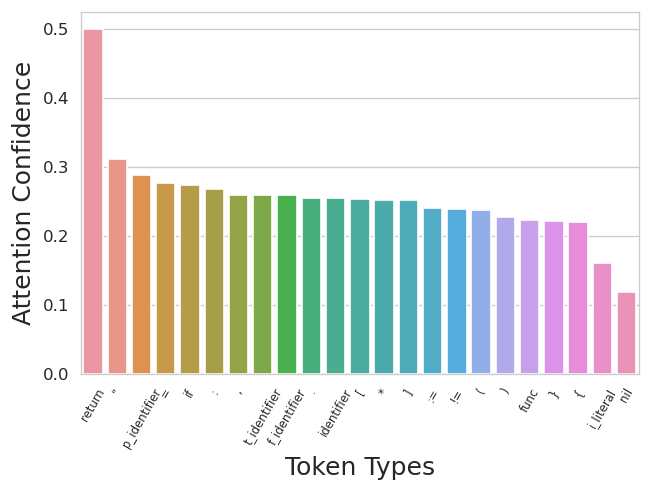

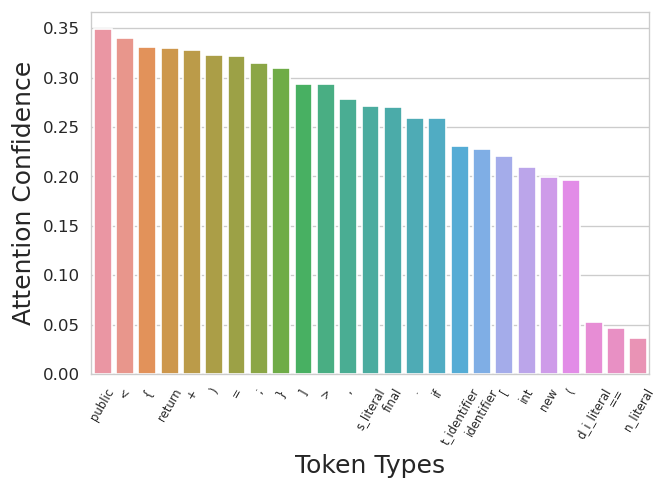

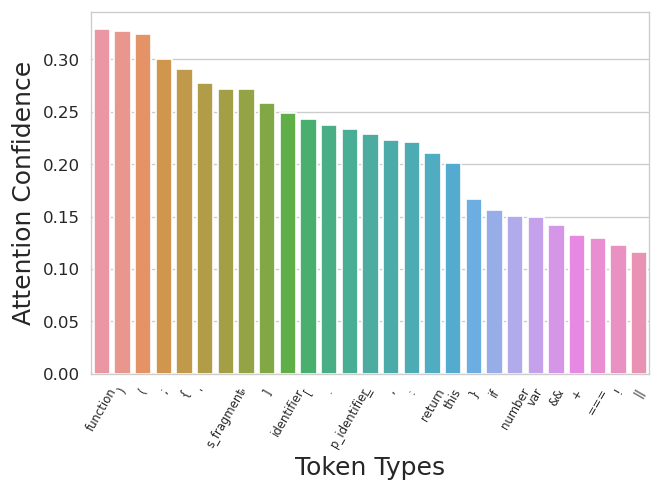

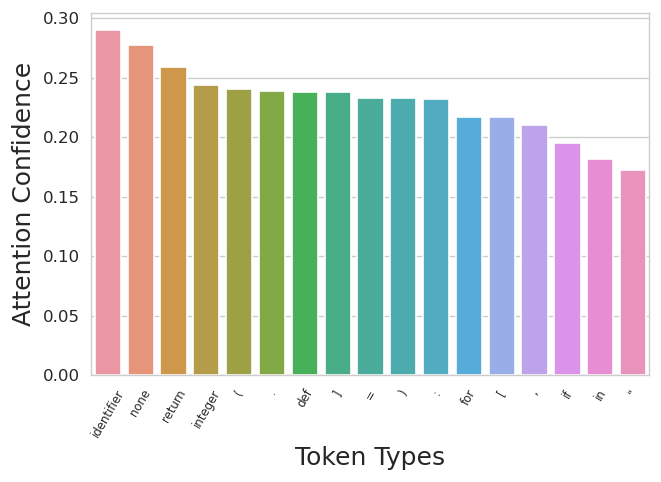

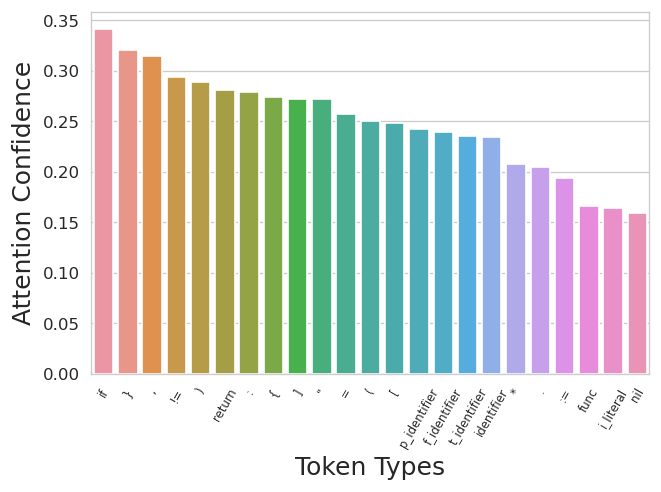

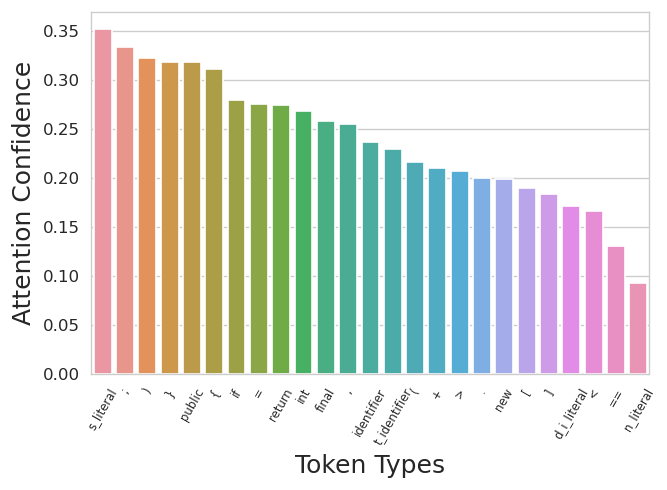

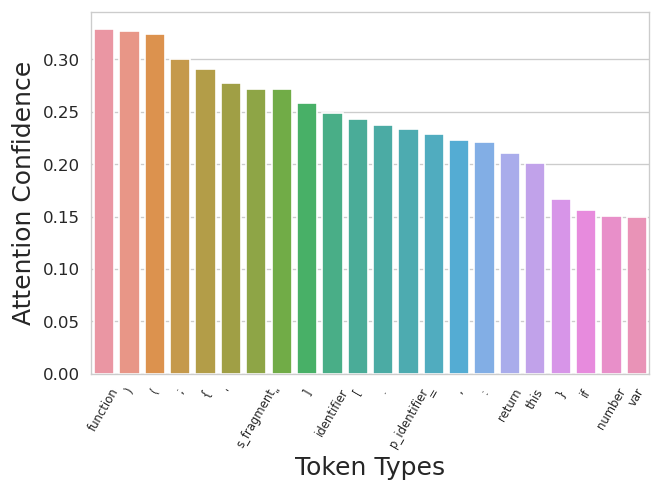

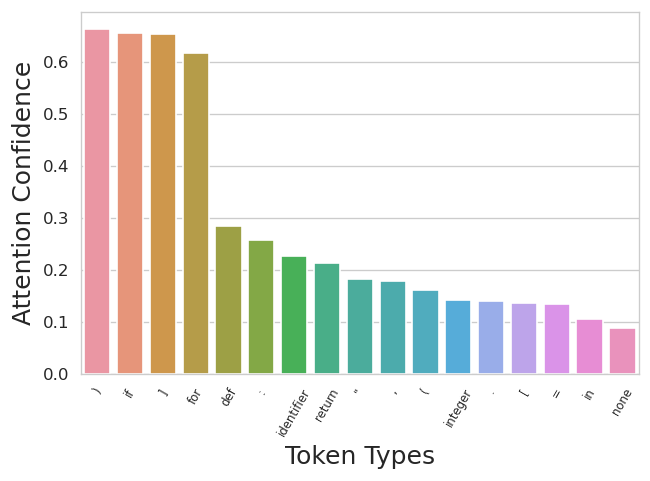

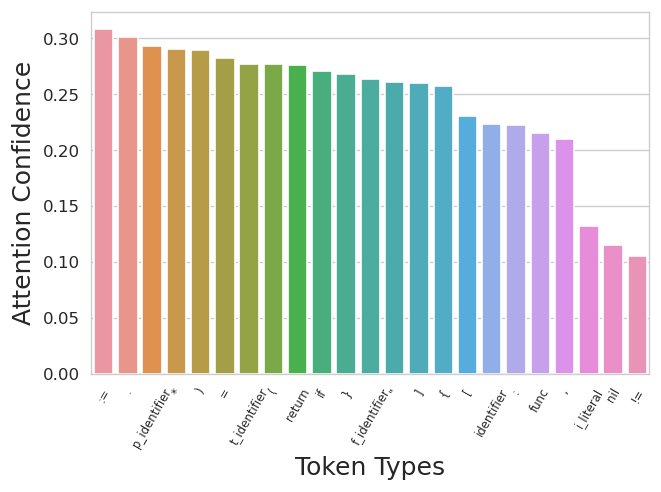

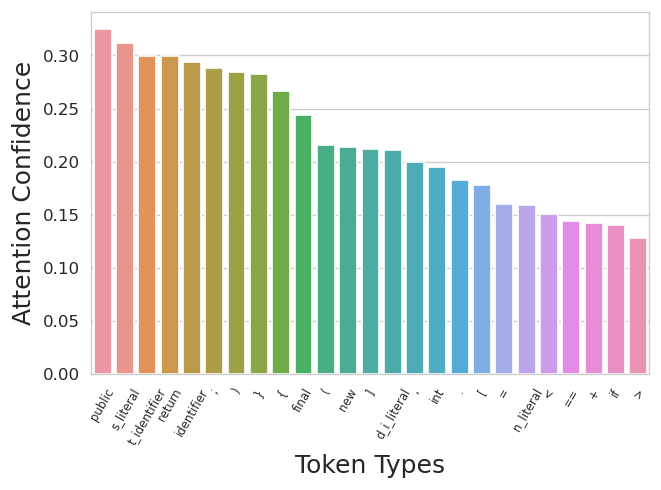

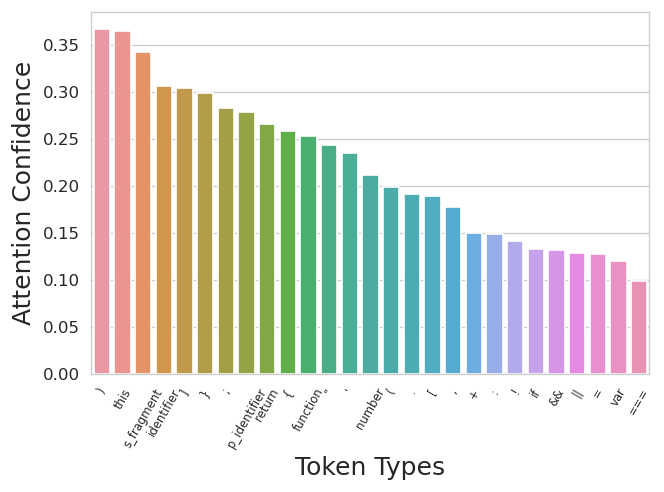

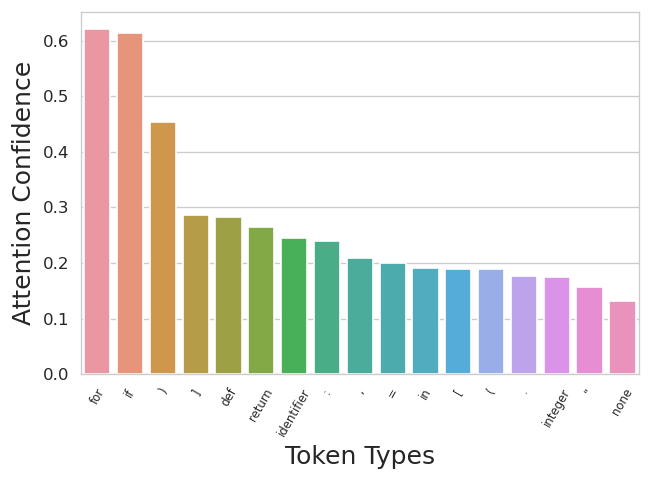

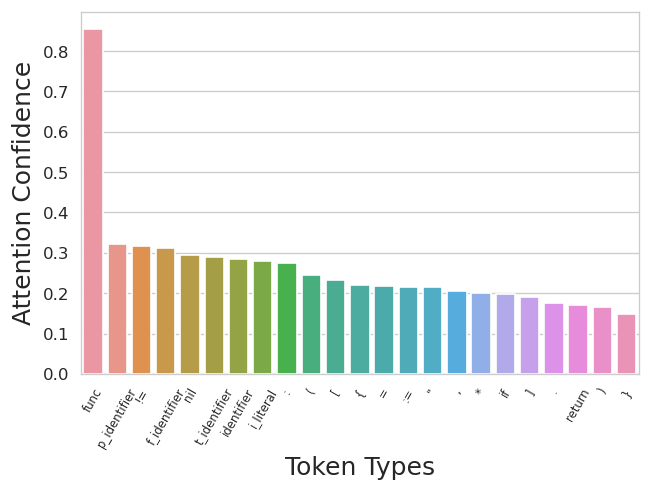

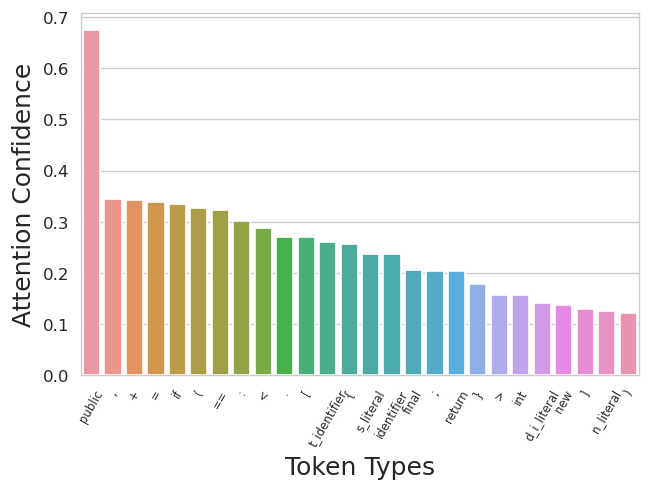

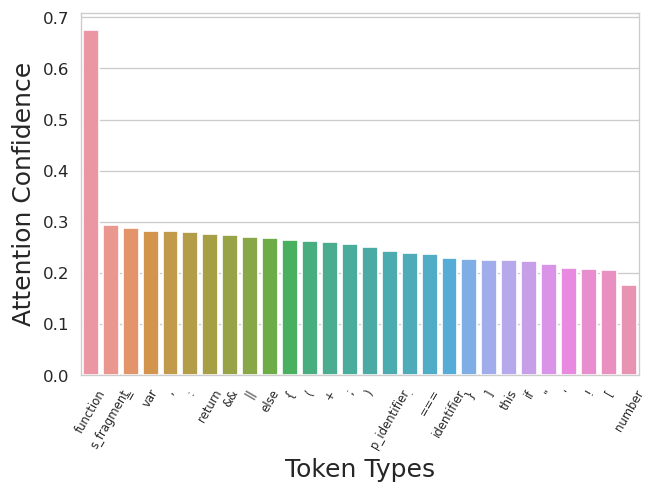

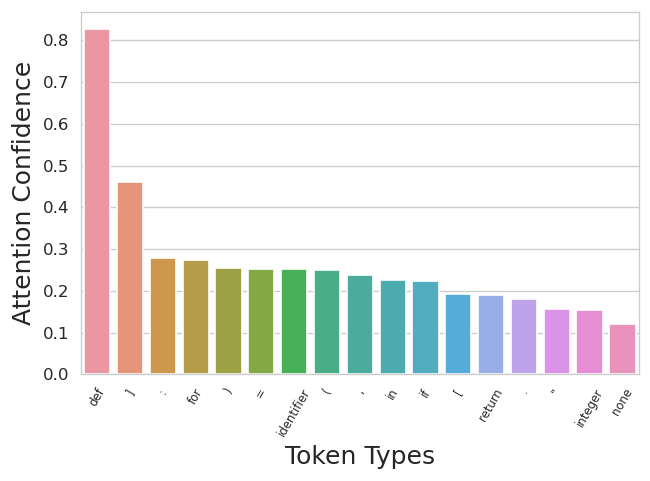

In [121]:
models=['rb','cb','gcb','uc']
model_full_name={'rb':'RoBERTa',"cb":'CodeBERT','gcb':'GraphCodeBERT','uc':'UniXcoder'}
languages=['go','java','js','python']
language_full_name={'go':'Go','java':'Java','js':'JavaScript','python':'Python'}
for model in models:
    for language in languages:
        _keys = list(eval(model+'_'+language+'_sorted_value').keys())
        _values = list(eval(model+'_'+language+'_sorted_value').values())
        df = pd.DataFrame(_keys, columns=['Token Types'])
        df = pd.concat([df, pd.DataFrame(_values,columns=['Attention Confidence'])],axis=1)
        sns.set_style('whitegrid')
        plt.subplots(figsize = (6,4), dpi = 120)
        plt.xticks(rotation=60)
        plt.xticks(fontsize=7)
        p=sns.barplot(x="Token Types", y="Attention Confidence", data=df)#, palette="Blues_r")
        p.set_xlabel('Token Types',fontsize=15)
        p.set_ylabel('Attention Confidence',fontsize=15)
        #plt.title("Token Types' Attention Confidence of "+model_full_name[model]+'('+language_full_name[language]+')')
        plt.savefig('../'+"Token Types' Attention Confidence of "+model_full_name[model]+'('+language_full_name[language]+')'+'.pdf', dpi=300,format="pdf", bbox_inches="tight")
        plt.show()

In [7]:
df['rb_token_values'].sum()

6.29196243787319

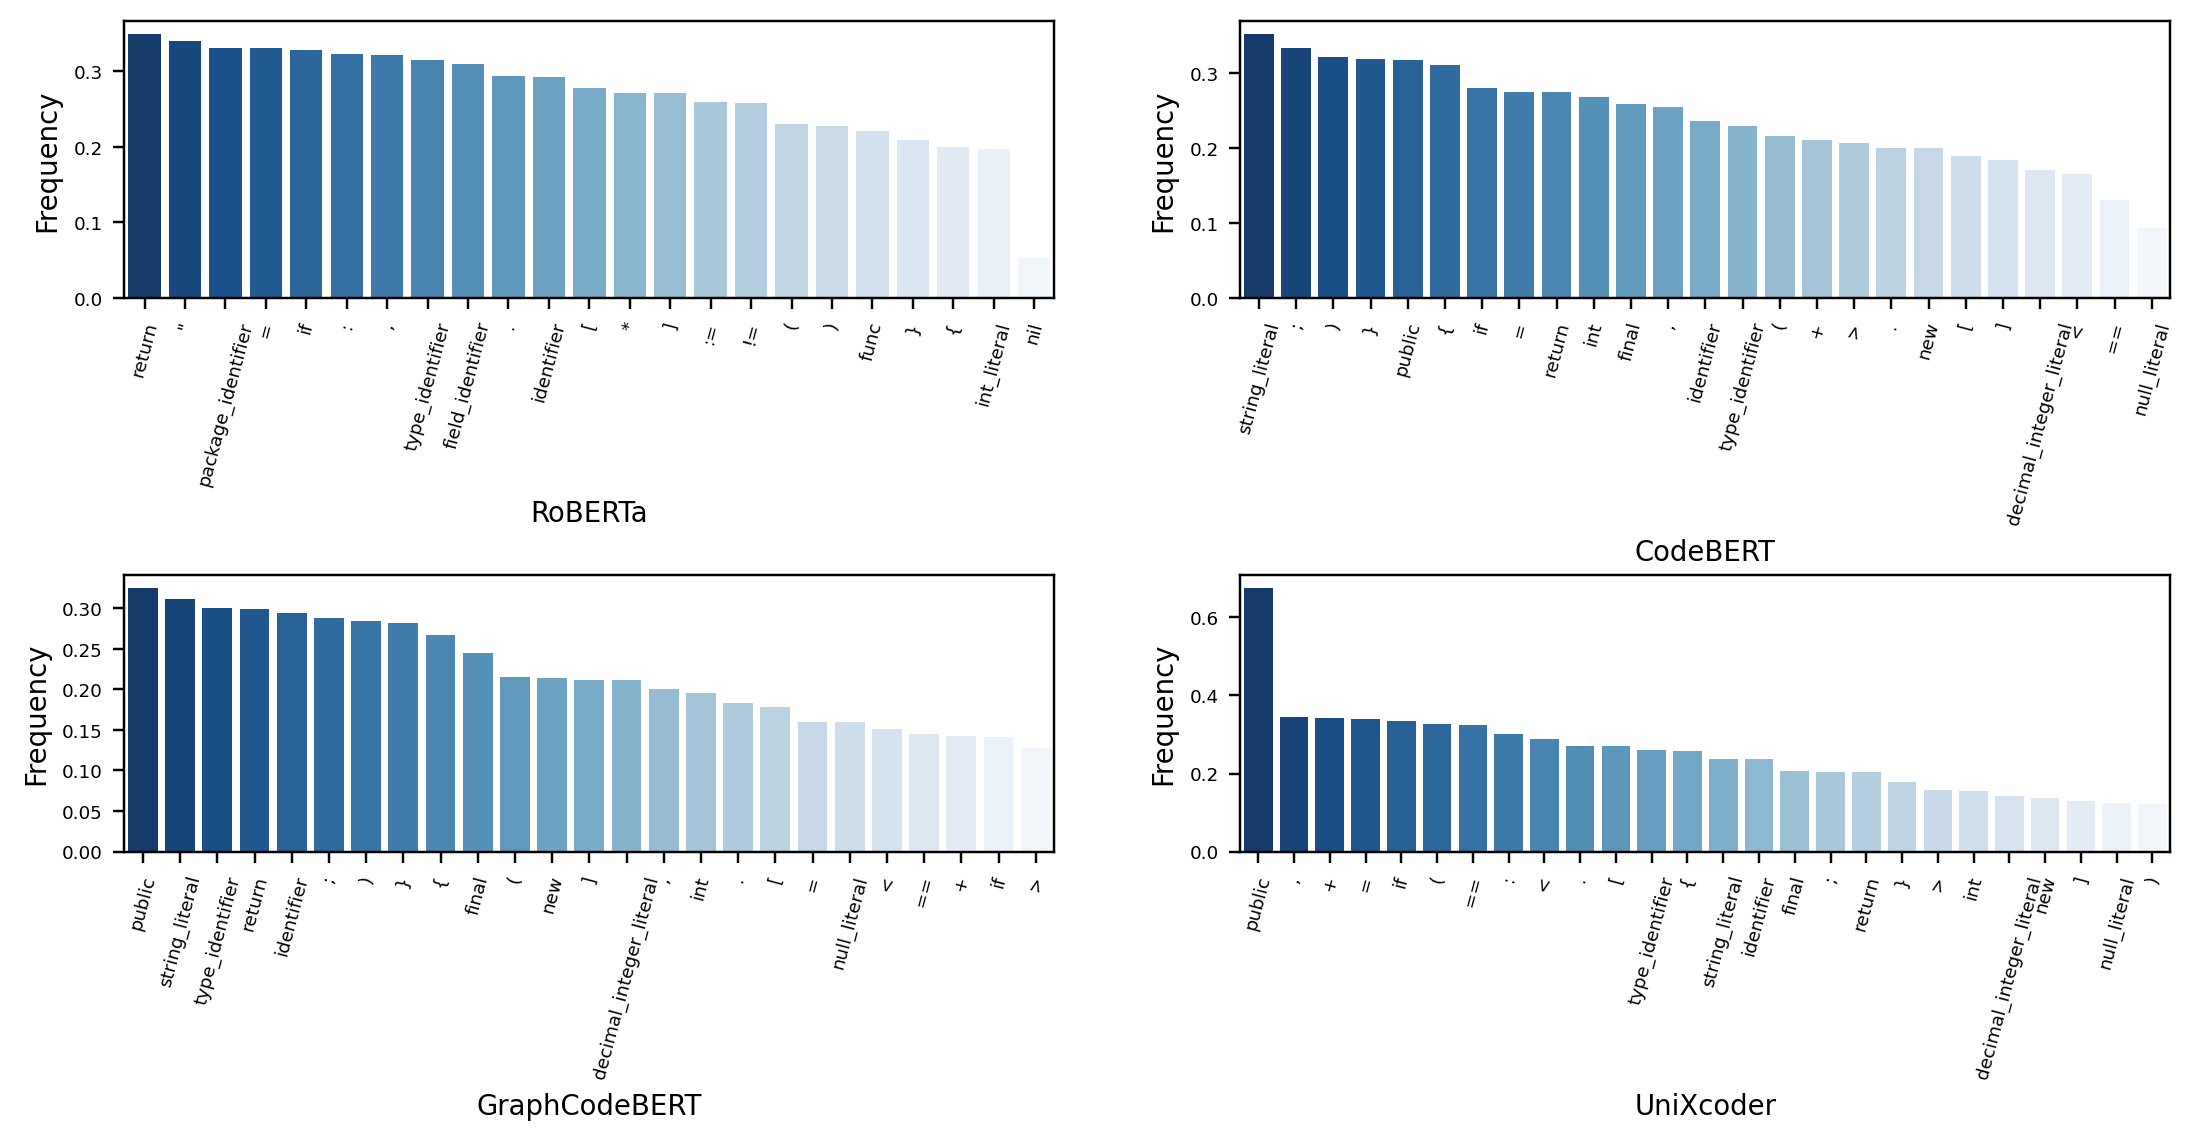

In [8]:
# plt.figure(figsize=(12,5))
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)
# ax2.set_xlabel('区域')
# ax2.set_ylabel('数量')
fig, axes = plt.subplots(2, 2,  figsize=(12,5), dpi = 220)
# print(axes)
fig.subplots_adjust(hspace=1)
# ax.set_xlabel('Code Token')
# ax.set_ylabel('Frequency')
# token type freq rank
# 一个模型的一个语言的，过滤掉0.25，
axes[0,0].tick_params(axis='x', rotation=75, labelsize=6)
axes[0,1].tick_params(axis='x', rotation=75, labelsize=6)
axes[1,0].tick_params(axis='x', rotation=75, labelsize=6)
axes[1,1].tick_params(axis='x', rotation=75, labelsize=6)
axes[0,0].tick_params(axis='y', labelsize=6)
axes[0,1].tick_params(axis='y', labelsize=6)
axes[1,0].tick_params(axis='y', labelsize=6)
axes[1,1].tick_params(axis='y', labelsize=6)
sns.barplot(data=df, x='rb_token_keys', y='rb_token_values', ax=axes[0,0], palette="Blues_r")
axes[0,0].set_xlabel('RoBERTa',fontsize=9)
axes[0,0].set_ylabel('Frequency',fontsize=9)
sns.barplot(data=df, x='cb_token_keys', y='cb_token_values', ax=axes[0,1], palette="Blues_r")
axes[0,1].set_xlabel('CodeBERT',fontsize=9)
axes[0,1].set_ylabel('Frequency',fontsize=9)
sns.barplot(data=df, x='gcb_token_keys', y='gcb_token_values', ax=axes[1,0], palette="Blues_r")
axes[1,0].set_xlabel('GraphCodeBERT',fontsize=9)
axes[1,0].set_ylabel('Frequency',fontsize=9)
sns.barplot(data=df, x='uc_token_keys', y='uc_token_values', ax=axes[1,1], palette="Blues_r")
axes[1,1].set_xlabel('UniXcoder',fontsize=9)
axes[1,1].set_ylabel('Frequency',fontsize=9)
plt.savefig('../java_freq_rank.pdf', dpi=300,format="pdf", bbox_inches="tight")

In [9]:
df = pd.DataFrame(list(rb_java_sorted_value.keys()), columns=['java_rb_token_keys'])
df = pd.concat([df, pd.DataFrame(list(rb_java_sorted_value.values()),columns=['java_rb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(cb_java_sorted_value.keys()),columns=['java_cb_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(cb_java_sorted_value.values()),columns=['java_cb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(gcb_java_sorted_value.keys()),columns=['java_gcb_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(gcb_java_sorted_value.values()),columns=['java_gcb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(ct5_java_sorted_value.keys()),columns=['java_ct5_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(ct5_java_sorted_value.values()),columns=['java_ct5_token_values'])],axis=1)

df = pd.concat([df, pd.DataFrame(list(rb_go_sorted_value.keys()),columns=['go_rb_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(rb_go_sorted_value.values()),columns=['go_rb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(cb_go_sorted_value.keys()),columns=['go_cb_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(cb_go_sorted_value.values()),columns=['go_cb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(gcb_go_sorted_value.keys()),columns=['go_gcb_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(gcb_go_sorted_value.values()),columns=['go_gcb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(ct5_go_sorted_value.keys()),columns=['go_ct5_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(ct5_go_sorted_value.values()),columns=['go_ct5_token_values'])],axis=1)

df = pd.concat([df, pd.DataFrame(list(rb_js_sorted_value.keys()),columns=['js_rb_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(rb_js_sorted_value.values()),columns=['js_rb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(cb_js_sorted_value.keys()),columns=['js_cb_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(cb_js_sorted_value.values()),columns=['js_cb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(gcb_js_sorted_value.keys()),columns=['js_gcb_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(gcb_js_sorted_value.values()),columns=['js_gcb_token_values'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(ct5_js_sorted_value.keys()),columns=['js_ct5_token_keys'])],axis=1)
df = pd.concat([df, pd.DataFrame(list(ct5_js_sorted_value.values()),columns=['js_ct5_token_values'])],axis=1)

fig, axes = plt.subplots(3,4, figsize=(22,6), dpi = 280)
# print(axes)
# print(axes)
fig.subplots_adjust(hspace=2.5)
# ax.set_xlabel('Code Token')
# ax.set_ylabel('Frequency')
# token type freq rank
# 一个模型的一个语言的，过滤掉0.25，
axes[0,0].tick_params(axis='x', rotation=75, labelsize=5)
axes[0,1].tick_params(axis='x', rotation=75, labelsize=5)
axes[0,2].tick_params(axis='x', rotation=75, labelsize=5)
axes[0,3].tick_params(axis='x', rotation=75, labelsize=5)
axes[1,0].tick_params(axis='x', rotation=75, labelsize=5)
axes[1,1].tick_params(axis='x', rotation=75, labelsize=5)
axes[1,2].tick_params(axis='x', rotation=75, labelsize=5)
axes[1,3].tick_params(axis='x', rotation=75, labelsize=5)
axes[2,0].tick_params(axis='x', rotation=75, labelsize=5)
axes[2,1].tick_params(axis='x', rotation=75, labelsize=5)
axes[2,2].tick_params(axis='x', rotation=75, labelsize=5)
axes[2,3].tick_params(axis='x', rotation=75, labelsize=5)

axes[0,0].tick_params(axis='y', labelsize=5)
axes[0,1].tick_params(axis='y', labelsize=5)
axes[0,2].tick_params(axis='y', labelsize=5)
axes[0,3].tick_params(axis='y', labelsize=5)
axes[1,0].tick_params(axis='y', labelsize=5)
axes[1,1].tick_params(axis='y', labelsize=5)
axes[1,2].tick_params(axis='y', labelsize=5)
axes[1,3].tick_params(axis='y', labelsize=5)
axes[2,0].tick_params(axis='y', labelsize=5)
axes[2,1].tick_params(axis='y', labelsize=5)
axes[2,2].tick_params(axis='y', labelsize=5)
axes[2,3].tick_params(axis='y', labelsize=5)

sns.barplot(data=df, x='java_rb_token_keys', y='java_rb_token_values', ax=axes[0,0], palette="Blues_r")
axes[0,0].set_xlabel('RoBERTa',fontsize=7)
axes[0,0].set_ylabel('Frequency(Java)',fontsize=9)
sns.barplot(data=df, x='java_cb_token_keys', y='java_cb_token_values', ax=axes[0,1], palette="Blues_r")
axes[0,1].set_xlabel('CodeBERT',fontsize=7)
axes[0,1].set_ylabel('Frequency(Java)',fontsize=9)
sns.barplot(data=df, x='java_gcb_token_keys', y='java_gcb_token_values', ax=axes[0,2], palette="Blues_r")
axes[0,2].set_xlabel('GraphCodeBERT',fontsize=7)
axes[0,2].set_ylabel('Frequency(Java)',fontsize=9)
sns.barplot(data=df, x='java_ct5_token_keys', y='java_ct5_token_values', ax=axes[0,3], palette="Blues_r")
axes[0,3].set_xlabel('CodeT5',fontsize=7)
axes[0,3].set_ylabel('Frequency(Java)',fontsize=9)

sns.barplot(data=df, x='go_rb_token_keys', y='go_rb_token_values', ax=axes[1,0], palette="Blues_r")
axes[1,0].set_xlabel('RoBERTa',fontsize=7)
axes[1,0].set_ylabel('Frequency(Go)',fontsize=9)
sns.barplot(data=df, x='go_cb_token_keys', y='go_cb_token_values', ax=axes[1,1], palette="Blues_r")
axes[1,1].set_xlabel('CodeBERT',fontsize=7)
axes[1,1].set_ylabel('Frequency(Go)',fontsize=9)
sns.barplot(data=df, x='go_gcb_token_keys', y='go_gcb_token_values', ax=axes[1,2], palette="Blues_r")
axes[1,2].set_xlabel('GraphCodeBERT',fontsize=7)
axes[1,2].set_ylabel('Frequency(Go)',fontsize=9)
sns.barplot(data=df, x='go_ct5_token_keys', y='go_ct5_token_values', ax=axes[1,3], palette="Blues_r")
axes[1,3].set_xlabel('CodeT5',fontsize=7)
axes[1,3].set_ylabel('Frequency(Go)',fontsize=9)

sns.barplot(data=df, x='js_rb_token_keys', y='js_rb_token_values', ax=axes[2,0], palette="Blues_r")
axes[2,0].set_xlabel('RoBERTa',fontsize=7)
axes[2,0].set_ylabel('Frequency(JS)',fontsize=9)
sns.barplot(data=df, x='js_cb_token_keys', y='js_cb_token_values', ax=axes[2,1], palette="Blues_r")
axes[2,1].set_xlabel('CodeBERT',fontsize=7)
axes[2,1].set_ylabel('Frequency(JS)',fontsize=9)
sns.barplot(data=df, x='js_gcb_token_keys', y='js_gcb_token_values', ax=axes[2,2], palette="Blues_r")
axes[2,2].set_xlabel('GraphCodeBERT',fontsize=7)
axes[2,2].set_ylabel('Frequency(JS)',fontsize=9)
sns.barplot(data=df, x='js_ct5_token_keys', y='js_ct5_token_values', ax=axes[2,3], palette="Blues_r")
axes[2,3].set_xlabel('CodeT5',fontsize=7)
axes[2,3].set_ylabel('Frequency(JS)',fontsize=9)
plt.savefig('../all_freq_rank.pdf', dpi=300,format="pdf", bbox_inches="tight")

NameError: name 'ct5_java_sorted_value' is not defined

In [10]:
_keys = list(cb_js_sorted_value.keys())
_values = list(cb_js_sorted_value.values())
df = pd.DataFrame(_keys, columns=['token_keys'])
df = pd.concat([df, pd.DataFrame(_values,columns=['token_values'])],axis=1)

<AxesSubplot:xlabel='token_keys', ylabel='token_values'>

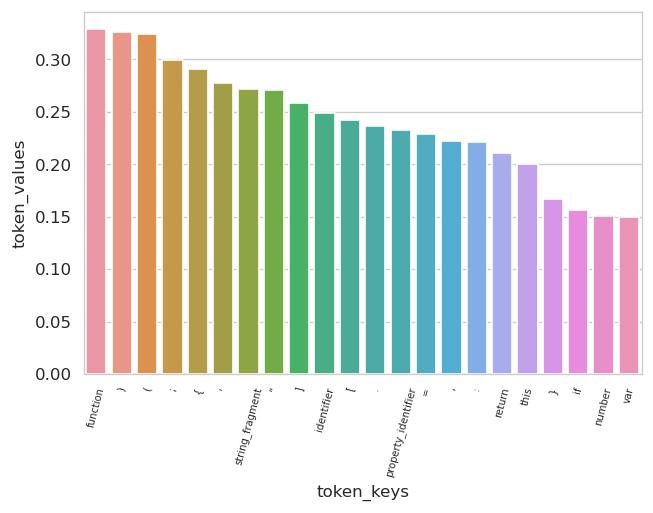

In [11]:
sns.set_style('whitegrid')
plt.subplots(figsize = (6,4), dpi = 120)
plt.xticks(rotation=75)
plt.xticks(fontsize=6)
sns.barplot(x="token_keys", y="token_values", data=df)